In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [4]:
# Load the pre-saved CSV file
combined_df_kc_tracking = pd.read_csv("combined_tracking_kc.csv")

In [7]:
combined_df_kc_tracking.head(10)

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091110,55,40011.0,Travis Kelce,1,BEFORE_SNAP,2022-09-11 20:26:54.4,87.0,KC,left,90.58,30.43,1.63,0.02,0.16,306.95,333.36,huddle_break_offense
1,2022091110,55,40011.0,Travis Kelce,2,BEFORE_SNAP,2022-09-11 20:26:54.5,87.0,KC,left,90.52,30.58,1.68,0.22,0.16,316.15,335.72,NaN
2,2022091110,55,40011.0,Travis Kelce,3,BEFORE_SNAP,2022-09-11 20:26:54.6,87.0,KC,left,90.44,30.73,1.69,0.16,0.17,320.93,335.54,NaN
3,2022091110,55,40011.0,Travis Kelce,4,BEFORE_SNAP,2022-09-11 20:26:54.7,87.0,KC,left,90.38,30.88,1.66,0.43,0.17,328.26,338.87,NaN
4,2022091110,55,40011.0,Travis Kelce,5,BEFORE_SNAP,2022-09-11 20:26:54.8,87.0,KC,left,90.32,31.04,1.67,0.49,0.17,337.98,340.63,NaN
5,2022091110,55,40011.0,Travis Kelce,6,BEFORE_SNAP,2022-09-11 20:26:54.9,87.0,KC,left,90.26,31.20,1.70,0.24,0.17,346.16,339.51,NaN
6,2022091110,55,40011.0,Travis Kelce,7,BEFORE_SNAP,2022-09-11 20:26:55,87.0,KC,left,90.20,31.36,1.69,0.23,0.17,350.45,340.18,NaN
7,2022091110,55,40011.0,Travis Kelce,8,BEFORE_SNAP,2022-09-11 20:26:55.1,87.0,KC,left,90.14,31.52,1.64,0.37,0.17,354.25,340.95,NaN
8,2022091110,55,40011.0,Travis Kelce,9,BEFORE_SNAP,2022-09-11 20:26:55.2,87.0,KC,left,90.09,31.67,1.58,0.50,0.16,1.91,341.43,NaN
9,2022091110,55,40011.0,Travis Kelce,10,BEFORE_SNAP,2022-09-11 20:26:55.3,87.0,KC,left,90.04,31.82,1.59,0.38,0.16,3.13,339.24,NaN


In [8]:
# Saving the first 1000 rows to an Excel file
output_file_path = "combined_df_kc_tracking_output.xlsx"
combined_df_kc_tracking.head(1000).to_excel(output_file_path, index=False)

In [56]:
data = pd.read_excel("KC Plays - Copy.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   quarter                        527 non-null    int64 
 1   down                           527 non-null    int64 
 2   yardsToGo                      527 non-null    int64 
 3   yardlineNumber                 527 non-null    int64 
 4   gameClock                      527 non-null    object
 5   preSnapHomeScore               527 non-null    int64 
 6   preSnapVisitorScore            527 non-null    int64 
 7   offenseFormation               522 non-null    object
 8   receiverAlignmentLEFT          527 non-null    object
 9   receiverAlignmentRIGHT         527 non-null    object
 10  ClockLeftToPlay_SecLessThan10  527 non-null    int64 
 11  PassOrRun                      527 non-null    int64 
 12  pff_runPassOption              527 non-null    int64 
 13  pff_p

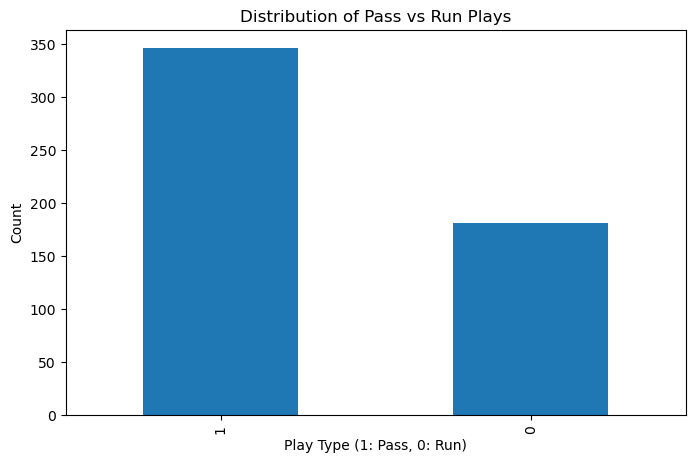

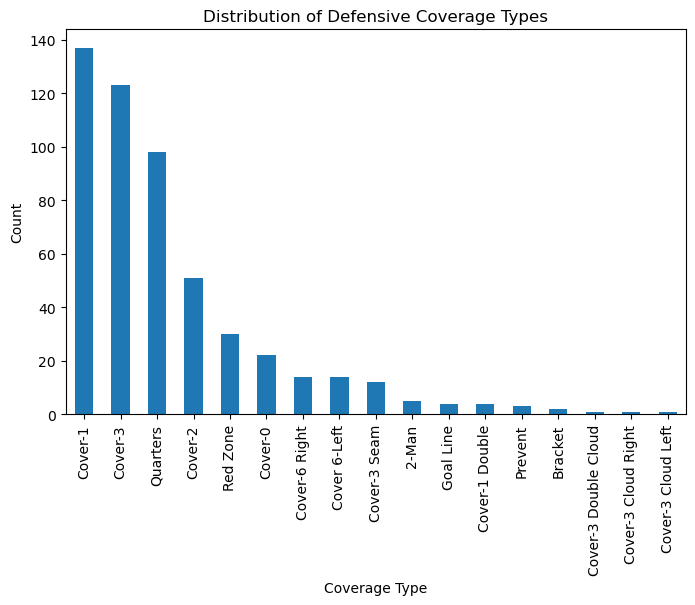

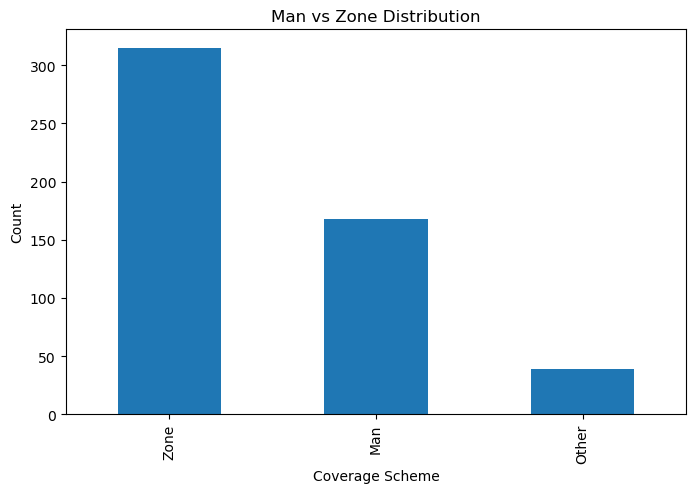

{'Data Info': None,
 'Summary Statistics':           quarter        down   yardsToGo  yardlineNumber  preSnapHomeScore  \
 count  527.000000  527.000000  527.000000      527.000000        527.000000   
 mean     2.569260    1.745731    8.330171       28.166983         10.444023   
 std      1.139693    0.789580    3.863781       13.712370          7.808558   
 min      1.000000    1.000000    1.000000        1.000000          0.000000   
 25%      2.000000    1.000000    6.000000       18.000000          5.000000   
 50%      3.000000    2.000000   10.000000       29.000000         10.000000   
 75%      4.000000    2.000000   10.000000       40.000000         16.000000   
 max      5.000000    4.000000   20.000000       50.000000         31.000000   
 
        preSnapVisitorScore  ClockLeftToPlay_SecLessThan10   PassOrRun  \
 count           527.000000                     527.000000  527.000000   
 mean             15.275142                       0.466793    0.656546   
 std          

In [57]:
import matplotlib.pyplot as plt

# Basic Exploratory Data Analysis (EDA) on the dataset

# Overview of the dataset structure
data_info = data.info()

# Summary statistics for numerical columns
summary_stats = data.describe()

# Count of Pass vs Run Plays
pass_run_counts = data['PassOrRun'].value_counts()

# Count of defensive coverage types
coverage_counts = data['pff_passCoverage'].value_counts()

# Count of man vs zone defensive schemes
man_zone_counts = data['pff_manZone'].value_counts()

# Displaying results
results = {
    "Data Info": data_info,
    "Summary Statistics": summary_stats,
    "Pass vs Run Counts": pass_run_counts,
    "Defensive Coverage Counts": coverage_counts,
    "Man vs Zone Counts": man_zone_counts,
}

# Plot Pass vs Run distribution
plt.figure(figsize=(8, 5))
pass_run_counts.plot(kind='bar')
plt.title('Distribution of Pass vs Run Plays')
plt.xlabel('Play Type (1: Pass, 0: Run)')
plt.ylabel('Count')
plt.show()

# Plot Defensive Coverage Types
plt.figure(figsize=(8, 5))
coverage_counts.plot(kind='bar')
plt.title('Distribution of Defensive Coverage Types')
plt.xlabel('Coverage Type')
plt.ylabel('Count')
plt.show()

# Plot Man vs Zone distribution
plt.figure(figsize=(8, 5))
man_zone_counts.plot(kind='bar')
plt.title('Man vs Zone Distribution')
plt.xlabel('Coverage Scheme')
plt.ylabel('Count')
plt.show()

results


# Preprocessing and XGBOOST CODE

In [53]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    average_precision_score, f1_score, classification_report
)
import xgboost as xgb

# Load dataset
file_path = 'plays - Copy.xlsx'
data = pd.read_excel(file_path)

# Step 1: Preprocessing
# Convert gameClock (datetime.time format) to seconds
data['gameClock_seconds'] = data['gameClock'].apply(
    lambda x: x.hour * 60 + x.minute #ITS ACTUALLY MINS AND SECS BUT PYTHON INHERENTLY TAKES IT AS HOURS AND MINS HENCE JUGAAD
)

# Create "2mindrill", "3mindrill", and "5mindrill" columns
data['2mindrill'] = (data['gameClock_seconds'] <= 120).astype(int)
data['3mindrill'] = (data['gameClock_seconds'] <= 180).astype(int)
data['5mindrill'] = (data['gameClock_seconds'] <= 300).astype(int)
data['10mindrill'] = (data['gameClock_seconds'] <= 600).astype(int)
data['15mindrill'] = (data['gameClock_seconds'] <= 900).astype(int)

# Drop the temporary gameClock_seconds column
data.drop(columns=['gameClock_seconds'], inplace=True)

# One-hot encoding for pff_runPassOption, pff_passCoverage, and offenseFormation
encoded_run_pass_option = pd.get_dummies(data['pff_runPassOption'], prefix='runPassOption')
encoded_pass_coverage = pd.get_dummies(data['pff_passCoverage'], prefix='passCoverage')
encoded_offense_formation = pd.get_dummies(data['offenseFormation'], prefix='offenseFormation')

# Merge one-hot encoded columns into the main DataFrame
data = pd.concat(
    [data, encoded_run_pass_option, encoded_pass_coverage, encoded_offense_formation],
    axis=1
)

# Drop original columns after encoding
data.drop(columns=['pff_runPassOption', 'pff_passCoverage', 'offenseFormation'], inplace=True)

# Step 1: Preprocessing (if required for consistency)
# Convert 'receiverAlignmentLEFT' and 'receiverAlignmentRIGHT' to numeric
data['receiverAlignmentLEFT'] = pd.to_numeric(data['receiverAlignmentLEFT'], errors='coerce')
data['receiverAlignmentRIGHT'] = pd.to_numeric(data['receiverAlignmentRIGHT'], errors='coerce')

# Drop 'gameClock' if unnecessary
if 'gameClock' in data.columns:
    data.drop(columns=['gameClock'], inplace=True)

# Drop rows with NaN values that result from coercion (if any)
data.dropna(inplace=True)

# Ensure all columns are numeric or boolean
data = data.apply(pd.to_numeric, errors='coerce')

In [54]:


# Step 2: Prepare Features and Target
X = data.drop(columns=['PassOrRun'])
y = data['PassOrRun']

# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=28, stratify=y_train_full)

# Step 3: Define Optuna objective function
def custom_objective(trial):
    params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': trial.suggest_int('max_depth', 10, 15),  # Narrowed around the best value 13
    'learning_rate': trial.suggest_float('learning_rate', 0.15, 0.25),  # Around the best value 0.191
    'subsample': trial.suggest_float('subsample', 0.8, 0.85),  # Around the best value 0.833
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.74, 0.76),  # Around the best value 0.749
    'n_estimators': trial.suggest_int('n_estimators', 300, 400),  # Around the best value 344
    'reg_alpha': trial.suggest_float('reg_alpha', 4.5, 5),  # Around the best value 4.721
    'reg_lambda': trial.suggest_float('reg_lambda', 5.5, 6)  # Around the best value 5.613
    }

    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = xgb.XGBClassifier(**params)
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        
        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(y_val_fold, y_pred))
    
    return np.mean(f1_scores)

# Step 4: Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(custom_objective, n_trials=500)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Step 5: Train the final model on the full training set
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_full, y_train_full)

# Step 6: Cross-validation on the training set
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train_full, y_train_full):
    X_train_fold, X_val_fold = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
    
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
    
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'f1_score': f1_score(y_val_fold, y_pred),
        'roc_auc': roc_auc_score(y_val_fold, y_pred_proba),
        'pr_auc': average_precision_score(y_val_fold, y_pred_proba)
    }
    print(f"Fold Classification Report:\n{classification_report(y_val_fold, y_pred)}")
    cv_results.append(metrics)

# Print cross-validation results
cv_df = pd.DataFrame(cv_results)
print("Cross-Validation Results:")
print(cv_df)

# Step 7: Evaluate on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1_score': f1_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba),
    'pr_auc': average_precision_score(y_test, y_test_pred_proba)
}

print("Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Print classification report for the test set
print(f"Test Set Classification Report:\n{classification_report(y_test, y_test_pred)}")


[I 2024-11-25 22:56:40,651] A new study created in memory with name: no-name-1a09ae4b-ca12-4607-8830-c7a1614d9a6d
[I 2024-11-25 22:56:44,753] Trial 0 finished with value: 0.7405773239078506 and parameters: {'max_depth': 15, 'learning_rate': 0.203761122837172, 'subsample': 0.8142832831137691, 'colsample_bytree': 0.750704171318501, 'n_estimators': 394, 'reg_alpha': 4.579188071713863, 'reg_lambda': 5.879900975639738}. Best is trial 0 with value: 0.7405773239078506.
[I 2024-11-25 22:56:48,263] Trial 1 finished with value: 0.7422387463054128 and parameters: {'max_depth': 12, 'learning_rate': 0.2002193961388625, 'subsample': 0.8275022263115414, 'colsample_bytree': 0.7477750054610557, 'n_estimators': 346, 'reg_alpha': 4.729463376407744, 'reg_lambda': 5.562867730596149}. Best is trial 1 with value: 0.7422387463054128.
[I 2024-11-25 22:56:52,248] Trial 2 finished with value: 0.7430734855981511 and parameters: {'max_depth': 14, 'learning_rate': 0.19169320166243586, 'subsample': 0.800108861082167

Best Hyperparameters: {'max_depth': 11, 'learning_rate': 0.1538118428807179, 'subsample': 0.8233360165902084, 'colsample_bytree': 0.7578219972957162, 'n_estimators': 300, 'reg_alpha': 4.988623980516514, 'reg_lambda': 5.622461490063615}
Fold Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1156
           1       0.74      0.73      0.74      1393

    accuracy                           0.72      2549
   macro avg       0.71      0.71      0.71      2549
weighted avg       0.72      0.72      0.72      2549

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1156
           1       0.75      0.77      0.76      1393

    accuracy                           0.74      2549
   macro avg       0.74      0.73      0.73      2549
weighted avg       0.74      0.74      0.74      2549

Fold Classification Report:
              precision   

Best Hyperparameters: {'max_depth': 4, 'learning_rate': 0.07590924748019505, 'subsample': 0.6259898764911795, 'colsample_bytree': 0.8236502512028963, 'n_estimators': 740, 'reg_alpha': 5.294177815513269, 'reg_lambda': 4.672093507702244}
Fold Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.79      0.88      0.83        56

    accuracy                           0.76        84
   macro avg       0.74      0.71      0.72        84
weighted avg       0.75      0.76      0.75        84

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.79      0.91      0.85        55

    accuracy                           0.79        84
   macro avg       0.78      0.73      0.74        84
weighted avg       0.78      0.79      0.78        84

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.88      0.89      0.88        55

    accuracy                           0.84        83
   macro avg       0.83      0.82      0.82        83
weighted avg       0.84      0.84      0.84        83

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68        28
           1       0.86      0.76      0.81        55

    accuracy                           0.76        83
   macro avg       0.74      0.76      0.74        83
weighted avg       0.78      0.76      0.76        83

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.80      0.87      0.83        55

    accuracy                           0.77        83
   macro avg       0.75      0.72      0.73        83
weighted avg       0.76      0.77      0.76        83

Cross-Validation Results:
   accuracy  precision    recall  f1_score   roc_auc    pr_auc
0  0.761905   0.790323  0.875000  0.830508  0.823342  0.905513
1  0.785714   0.793651  0.909091  0.847458  0.823197  0.888602
2  0.843373   0.875000  0.890909  0.882883  0.867532  0.920984
3  0.759036   0.857143  0.763636  0.807692  0.847403  0.882254
4  0.771084   0.800000  0.872727  0.834783  0.875325  0.936300
Test Set Metrics:
accuracy: 0.8095
precision: 0.8378
recall: 0.8857
f1_score: 0.8611
roc_auc: 0.7922
pr_auc: 0.8502
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70        35
           1       0.84      0.89      0.86        70

    accuracy                           0.81       105
   macro avg       0.79      0.77      0.78       105
weighted avg       0.81      0.81      0.81       105


# RF

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score, f1_score, classification_report
import optuna
import pandas as pd

# Step 3: Define Optuna objective function for Random Forest
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = RandomForestClassifier(**params, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(y_val_fold, y_pred))
    
    return np.mean(f1_scores)

# Step 4: Run Optuna optimization
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(rf_objective, n_trials=100)

# Best hyperparameters
best_params_rf = study_rf.best_params
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Step 5: Train the final Random Forest model on the full training set
final_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_model.fit(X_train_full, y_train_full)

# Step 6: Cross-validation on the training set
cv_results_rf = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train_full, y_train_full):
    X_train_fold, X_val_fold = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
    
    model = RandomForestClassifier(**best_params_rf, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'f1_score': f1_score(y_val_fold, y_pred),
        'roc_auc': roc_auc_score(y_val_fold, y_pred_proba),
        'pr_auc': average_precision_score(y_val_fold, y_pred_proba)
    }
    print(f"Fold Classification Report:\n{classification_report(y_val_fold, y_pred)}")
    cv_results_rf.append(metrics)

# Print cross-validation results
cv_df_rf = pd.DataFrame(cv_results_rf)
print("Cross-Validation Results for Random Forest:")
print(cv_df_rf)

# Step 7: Evaluate on the test set
y_test_pred_rf = final_rf_model.predict(X_test)
y_test_pred_proba_rf = final_rf_model.predict_proba(X_test)[:, 1]

test_metrics_rf = {
    'accuracy': accuracy_score(y_test, y_test_pred_rf),
    'precision': precision_score(y_test, y_test_pred_rf),
    'recall': recall_score(y_test, y_test_pred_rf),
    'f1_score': f1_score(y_test, y_test_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba_rf),
    'pr_auc': average_precision_score(y_test, y_test_pred_proba_rf)
}

print("Test Set Metrics for Random Forest:")
for metric, value in test_metrics_rf.items():
    print(f"{metric}: {value:.4f}")

# Print classification report for the test set
print(f"Test Set Classification Report for Random Forest:\n{classification_report(y_test, y_test_pred_rf)}")


[I 2024-11-25 23:44:47,155] A new study created in memory with name: no-name-15aa3fc0-24e8-4f63-96c7-44f95e1248de
[I 2024-11-25 23:47:52,950] Trial 0 finished with value: 0.7095311361251119 and parameters: {'n_estimators': 770, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.7095311361251119.
[I 2024-11-25 23:47:58,515] Trial 1 finished with value: 0.7646206112328991 and parameters: {'n_estimators': 120, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.7646206112328991.
[I 2024-11-25 23:50:54,020] Trial 2 finished with value: 0.6705508488011919 and parameters: {'n_estimators': 631, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.7646206112328991.
[I 2024-11-25 23:51:23,811] Trial 3 finished with value: 0.7531973017063931 

KeyboardInterrupt: 